# Predicting Fraudulent Transactions
##### Christie Djidjev

In [1]:
import pandas as pd
df = pd.read_csv('Fraud.csv')
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


## Exploring the Data


In [2]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.head().to_clipboard(sep=',')  

##### Count number of rows 

In [4]:
numRow = len(df)
print("Number of rows: ", numRow)

Number of rows:  6362620


##### Count number of fraudulent transactions

In [5]:
isFlagged = df['isFlaggedFraud']
count = 0
for i in range(len(isFlagged)):
  if isFlagged[i] == 1:
    count+=1
print("Number of transactions with 'isFlaggedFraud' == True: ", count)

Number of transactions with 'isFlaggedFraud' == True:  16


In [6]:
isFraud = df['isFraud']
count = 0
for i in range(len(isFraud)):
  if isFraud[i] == 1:
    count += 1
print("Number of transactions with 'isFraud' == True: ", count)

Number of transactions with 'isFraud' == True:  8213


##### Count fraudulent transactions by type 

In [7]:
trans_fraud = {}
trans_valid = {}
for t in df['type'].unique():
  trans_fraud[t] = 0
  trans_valid[t] = 0

for index, row in df.iterrows():
  if row['isFraud'] == 1:
    trans_fraud[row['type']] += 1
  else:
    trans_valid[row['type']] += 1
for t in df['type'].unique():
  print(t, trans_fraud[t], trans_valid[t])

PAYMENT 0 2151495
TRANSFER 4097 528812
CASH_OUT 4116 2233384
DEBIT 0 41432
CASH_IN 0 1399284


## Visualizations

##### Plot fraud by transaction type

<Axes: title={'center': 'Grouped Bar Graph with dataframe'}, xlabel='TRANSACTIONS'>

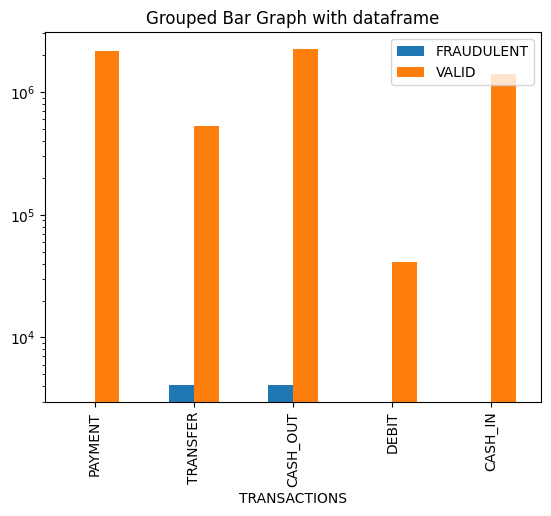

In [8]:
import matplotlib.pyplot as plt

# create data
plot_df = pd.DataFrame([['PAYMENT', 0, 2151495], ['TRANSFER', 4097, 528812], ['CASH_OUT', 4116, 2233384],
                   ['DEBIT', 0, 41432], ['CASH_IN', 0, 1399284]],
                  columns=['TRANSACTIONS', 'FRAUDULENT', 'VALID'])
  
# plot grouped bar chart
plot_df.plot(x='TRANSACTIONS',
        logy=True,
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

##### Plot heatmap of correlations

/var/folders/ld/4858sm992td86smbqcp88pwh0000gn/T/ipykernel_99537/4044871198.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

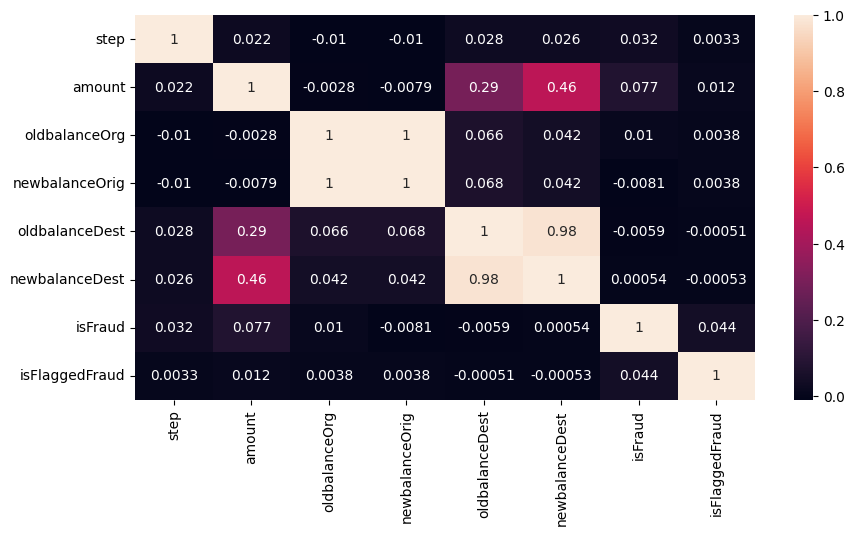

In [9]:
import seaborn as sns

#correllation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

## Preprocessing

##### Remove unnecessary features

In [10]:
df_copy = df.copy()
df_copy = df_copy.replace({'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'CASH_IN': 4})

x = df_copy.drop(columns=['isFraud','nameOrig','nameDest', 'oldbalanceDest', 'oldbalanceOrg'])
y = df['isFraud']

##### Split data into training and testing

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

## Modeling

#### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

#define regressor object 
lin_reg = LinearRegression() 
#fit machine learning model
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

lin_regscore = lin_reg.score(x_test, y_test)

print("LinearRegression score: ", lin_regscore)

LinearRegression score:  0.00996436398351963


#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

#define regressor object 
log_reg = LogisticRegression() 
#fit machine learning model
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

log_regscore = log_reg.score(x_test, y_test)

print("LogisticRegression score: ", log_regscore)

LogisticRegression score:  0.9979269546193235


#### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor 

#define regressor object 
decTree_reg = DecisionTreeRegressor() 
#fit machine learning model
decTree_reg.fit(x_train,y_train)
y_pred = decTree_reg.predict(x_test)

decTreescore = decTree_reg.score(x_test, y_test)

print("DecisionTreeRegressor score: ", decTreescore)

DecisionTreeRegressor score:  0.4269605422255006


#### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

#define regressor object 
randForest_reg = RandomForestClassifier() 
#fit machine learning model
randForest_reg.fit(x_train,y_train)
y_pred = randForest_reg.predict(x_test)

randForrestscore = randForest_reg.score(x_test, y_test)

print("RandomForestClassifier score: ", randForrestscore)

RandomForestClassifier score:  0.9995481421175554


##### Compare performance

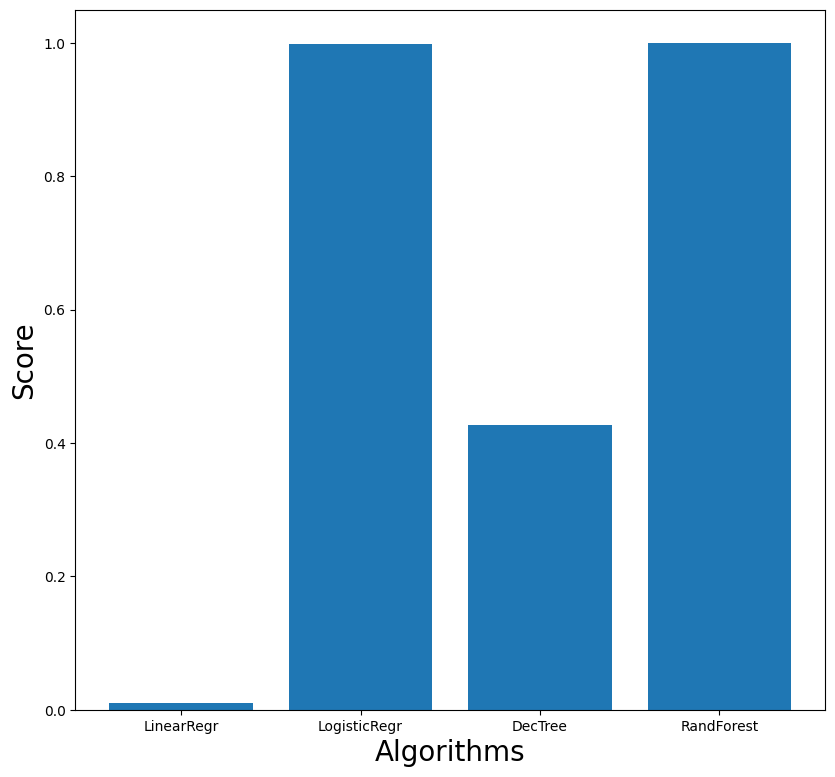

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_figwidth(7.5)
fig.set_figheight(7)
ax = fig.add_axes([0,0,1,1])
plt.rcParams.update({'font.size': 22})
ax.set_xlabel('Algorithms', fontsize=20)
ax.set_ylabel('Score', fontsize=20)
algortihms = ['LinearRegr', 'LogisticRegr', 'DecTree', 'RandForest']
scores = [lin_regscore,log_regscore,decTreescore,randForrestscore]
ax.bar(algortihms,scores)
plt.show()

##### Plot feature importance

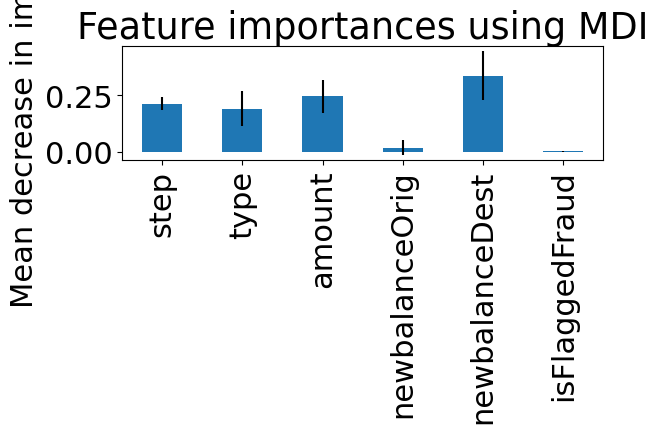

In [17]:
import numpy as np

feature_names = ['step', 'type', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFlaggedFraud']
importances = randForest_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in randForest_reg.estimators_], axis=0)


forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()